In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [15]:
data = pd.read_csv('data/peliculas_ETL.csv', low_memory=False, index_col='id')
df = data.copy()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42196 entries, 862 to 461257
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  42196 non-null  object 
 1   budget                 42196 non-null  float64
 2   genres                 42196 non-null  object 
 3   original_language      42196 non-null  object 
 4   overview               42196 non-null  object 
 5   popularity             42196 non-null  float64
 6   production_companies   42196 non-null  object 
 7   production_countries   42196 non-null  object 
 8   release_date           42196 non-null  object 
 9   revenue                42196 non-null  float64
 10  runtime                42196 non-null  float64
 11  spoken_languages       42196 non-null  object 
 12  status                 42196 non-null  object 
 13  tagline                42196 non-null  object 
 14  title                  42196 non-null  object 
 15  vote

In [16]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,42196.00,42196.00,42196.00,42196.00,42196.00,42196.00,42196.00,42196.00
mean,4160088.10,2.91,11166704.12,93.85,5.63,109.39,1991.91,709.56
std,17214991.45,5.74,63771779.02,37.58,1.92,489.34,23.84,77456.54
min,0.00,0.00,0.00,0.00,0.00,0.00,1874.00,-1.00
25%,0.00,0.39,0.00,85.00,5.00,3.00,1978.00,0.00
50%,0.00,1.14,0.00,95.00,6.00,10.00,2001.00,0.00
75%,0.00,3.72,0.00,106.00,6.80,35.00,2010.00,0.00
max,380000000.00,547.49,2787965087.00,1256.00,10.00,14075.00,2020.00,12396382.00


Eliminemos la columna fecha, ya que no nos va a servir.

In [17]:
df.drop('release_date', axis=1, inplace=True)

separemos las columnas tipo categoricas de las numericas.

In [18]:
columnas_df = ['belongs_to_collection', 'budget', 'genres', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'vote_average', 'vote_count', 'director',
       'actors_names', 'release_year', 'return']

In [19]:
cols_numeric = [columna for columna in columnas_df if df[columna].dtype in ['int64', 'float64']]
cols_categoric = [columna for columna in columnas_df if df[columna].dtype == 'O']
df_numeric = df[cols_numeric]
df_categoric = df[cols_categoric]

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)

Observemos un poco estos df

In [21]:
df_numeric.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,42196.00,42196.00,42196.00,42196.00,42196.00,42196.00,42196.00,42196.00
mean,4160088.10,2.91,11166704.12,93.85,5.63,109.39,1991.91,709.56
std,17214991.45,5.74,63771779.02,37.58,1.92,489.34,23.84,77456.54
min,0.00,0.00,0.00,0.00,0.00,0.00,1874.00,-1.00
25%,0.00,0.39,0.00,85.00,5.00,3.00,1978.00,0.00
50%,0.00,1.14,0.00,95.00,6.00,10.00,2001.00,0.00
75%,0.00,3.72,0.00,106.00,6.80,35.00,2010.00,0.00
max,380000000.00,547.49,2787965087.00,1256.00,10.00,14075.00,2020.00,12396382.00


In [22]:
df_categoric.describe()

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,spoken_languages,status,tagline,title,director,actors_names
count,42196,42196,42196,42196,42196,42196,42196,42196,42196,42196,42195,42196
unique,1678,3857,89,41138,21141,2246,1755,6,18941,42196,16786,39629
top,N/D,['Drama'],en,N/D,N/D,['United States of America'],['English'],Released,N/D,Toy Story,N/D,N/D
freq,37840,4563,30012,902,11010,16708,20837,41866,23157,1,812,2239


In [23]:
df.head()

,belongs_to_collection,budget,genres,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,director,actors_names,release_year,return
id,,,,,,,,,,,,,,,,,,,,
862,Toy Story Collection,30000000.00,"['Animation', 'Comedy', 'Family']",en,"Led by Woody, Andy's toys live happily in his ...",21.95,['Pixar Animation Studios'],['United States of America'],373554033.00,81.00,['English'],Released,N/D,Toy Story,7.70,5415.00,John Lasseter,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",1995,11.45
8844,N/D,65000000.00,"['Adventure', 'Fantasy', 'Family']",en,When siblings Judy and Peter discover an encha...,17.02,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],262797249.00,104.00,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.90,2413.00,Joe Johnston,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",1995,3.04
15602,Grumpy Old Men Collection,0.00,"['Romance', 'Comedy']",en,A family wedding reignites the ancient feud be...,11.71,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],0.00,101.00,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.50,92.00,Howard Deutch,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",1995,0.00
31357,N/D,16000000.00,"['Comedy', 'Drama', 'Romance']",en,"Cheated on, mistreated and stepped on, the wom...",3.86,['Twentieth Century Fox Film Corporation'],['United States of America'],81452156.00,127.00,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.10,34.00,Forest Whitaker,"['Whitney Houston', 'Angela Bassett', 'Loretta...",1995,4.09
11862,Father of the Bride Collection,0.00,['Comedy'],en,Just when George Banks has recovered from his ...,8.39,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],76578911.00,106.00,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.70,173.00,Charles Shyer,"['Steve Martin', 'Diane Keaton', 'Martin Short...",1995,0.00


AttributeError: Rectangle.set() got an unexpected keyword argument 'bins'

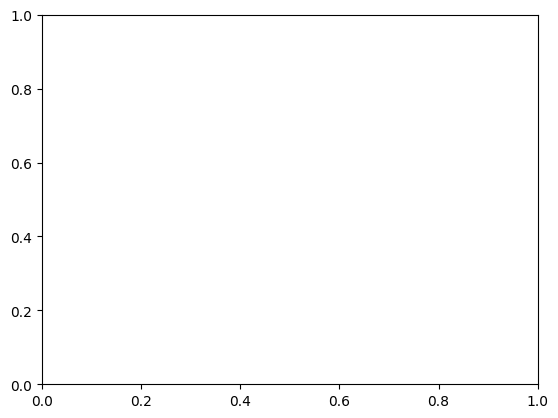